Project Title: Gold Extraction ML Modeling 

Project Intro:

In this project were taking a deep dive into the extraction process of gold from ore. Well be preparing a prototype for a ML model for Zyra. 

Project Description:

The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.

In this project we will be:

Preparing the data
Performing data analysis
Developing and training a model

In [3]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LinearRegression
from scipy.stats import bootstrap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [4]:
%matplotlib inline

In [5]:
try:
    golddf_train = pd.read_csv('/Users/macos/Downloads/gold_recovery_train.csv')
except:    
    golddf_train = pd.read_csv('/datasets/gold_recovery_train.csv')
try:    
    golddf_test = pd.read_csv('/Users/macos/Downloads/gold_recovery_test.csv')
except:    
    golddf_test = pd.read_csv('/datasets/gold_recovery_test.csv')
try:
    golddf_full = pd.read_csv('/Users/macos/Downloads/gold_recovery_full.csv')
except:
     golddf_full = pd.read_csv('/datasets/gold_recovery_full.csv')

Importing libraries and datasets.

In [6]:
def basicdataprep(df):
    print("DataFrame Info:")
    print(df.info(),"\n")
    print("Descriptive Stats:")
    print(df.describe(),"\n")
    print("Random Sample:")
    print(df.sample(5))
    print("Duplicates Amount:")
    print(df.duplicated().sum())
    print("DataFram Columns:")
    print(df.columns)
    return df



function for basic data prep.

In [7]:
basicdataprep(golddf_train)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 no

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [8]:
basicdataprep(golddf_test)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [9]:
basicdataprep(golddf_full)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 no

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [10]:
def checknan(df):
    print(df.isna().sum())
    
    
print("Nan Rougher Concentrate:")
print(checknan(golddf_train['rougher.output.concentrate_au']))
print()
print("Nan Rougher Feed:")
print(checknan(golddf_train['rougher.input.feed_au']))
print()
print("Nan Rougher Tail:") 
print(checknan(golddf_train['rougher.output.tail_au']))

Nan Rougher Concentrate:
82
None

Nan Rougher Feed:
83
None

Nan Rougher Tail:
2249
None


In [11]:
#Rougher Output Recovery Calculation 

C_rough = golddf_train['rougher.output.concentrate_au']
F_rough = golddf_train['rougher.input.feed_au']
T_rough = golddf_train['rougher.output.tail_au']

rec_train = golddf_train['rougher.output.recovery']


In [12]:
golddf_train['recalculated_rougher_recovery'] = (C_rough * (F_rough - T_rough)) / (F_rough * (C_rough - T_rough)) * 100

calculated recovery for Rougher Output

In [13]:
print(golddf_train['rougher.output.recovery'].head(5))

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64


In [14]:
print(golddf_train[['rougher.output.recovery', 'recalculated_rougher_recovery']].isna().sum())


rougher.output.recovery          2573
recalculated_rougher_recovery    2283
dtype: int64


golddf_train.replace([np.inf, -np.inf], np.nan, inplace=True)


golddf_train['recalculated_rougher_recovery'] = golddf_train['recalculated_rougher_recovery'].interpolate(method='nearest')
golddf_train['rougher.output.recovery'] = golddf_train['rougher.output.recovery'].interpolate(method='nearest')



golddf_train.loc[:, 'recalculated_rougher_recovery'] = golddf_train['recalculated_rougher_recovery'].fillna(golddf_train['recalculated_rougher_recovery'].median())
golddf_train.loc[:, 'rougher.output.recovery'] = golddf_train['rougher.output.recovery'].fillna(golddf_train['rougher.output.recovery'].median())


In [15]:
golddf_filtered = golddf_train[['rougher.output.recovery', 'recalculated_rougher_recovery']].dropna()

golddf_target = golddf_filtered['rougher.output.recovery']
golddf_pred = golddf_filtered['recalculated_rougher_recovery']

In [16]:
print(golddf_target)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 14287, dtype: float64


In [17]:
print(golddf_pred)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: recalculated_rougher_recovery, Length: 14287, dtype: float64


In [18]:
#golddf_target = golddf_train['rougher.output.recovery'].dropna()
#golddf_pred = golddf_train['recalculated_rougher_recovery'].dropna()
golddf_mae = mean_absolute_error(golddf_target, golddf_pred)
print(f"Mean Absolute Error Score: {golddf_mae:.4f}")

Mean Absolute Error Score: 0.0000


In [19]:
missing_features = set(golddf_train.columns) - set(golddf_test.columns)

print("Features not available in the test set:")

print(golddf_train[list(missing_features)].dtypes)

num_missing = len(missing_features)
print()
print(f"Number of missing features in training but not in test set: {num_missing:.2f}")


Features not available in the test set:
final.output.concentrate_ag                           float64
secondary_cleaner.output.tail_pb                      float64
primary_cleaner.output.concentrate_au                 float64
rougher.output.concentrate_au                         float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.concentrate_pb                 float64
primary_cleaner.output.tail_pb                        float64
final.output.recovery                                 float64
rougher.output.tail_sol                               float64
secondary_cleaner.output.tail_ag                      float64
rougher.output.tail_pb                                float64
final.output.tail_au                                  float64
rougher.output.tail_ag                                float64
rougher.output.concentrate_pb                         float64
final.output.concentrate_pb   

cheking for missing columns in test data 

In [20]:
print("Gold Df Train")
print(golddf_train.isna().sum())
print()
print('Gold Df Test')
print(golddf_test.isna().sum())

Gold Df Train
date                                             0
final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
                                              ... 
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
recalculated_rougher_recovery                 2283
Length: 88, dtype: int64

Gold Df Test
date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_a

golddf_test = golddf_test.fillna().mean()
golddf_train = golddf_train.fillna().mean()

In [21]:
golddf_train = golddf_train.interpolate(method='nearest')
golddf_test = golddf_test.interpolate(method='nearest')


/var/folders/nq/rjlw7m5x2hx0l0h5d2fjgyn80000gn/T/ipykernel_5104/3148167060.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  golddf_train = golddf_train.interpolate(method='nearest')
/var/folders/nq/rjlw7m5x2hx0l0h5d2fjgyn80000gn/T/ipykernel_5104/3148167060.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  golddf_test = golddf_test.interpolate(method='nearest')


filling Nan values

In [22]:
print(type(golddf_train))

<class 'pandas.core.frame.DataFrame'>


In [23]:
import os

# Create visuals folder (relative to notebook)
visuals_path = '../visuals'
os.makedirs(visuals_path, exist_ok=True)

In [24]:

print(os.path.abspath('../visuals'))

/Users/macos/Desktop/Data Science/Vs Code Projects/visuals


Gold Stages Train


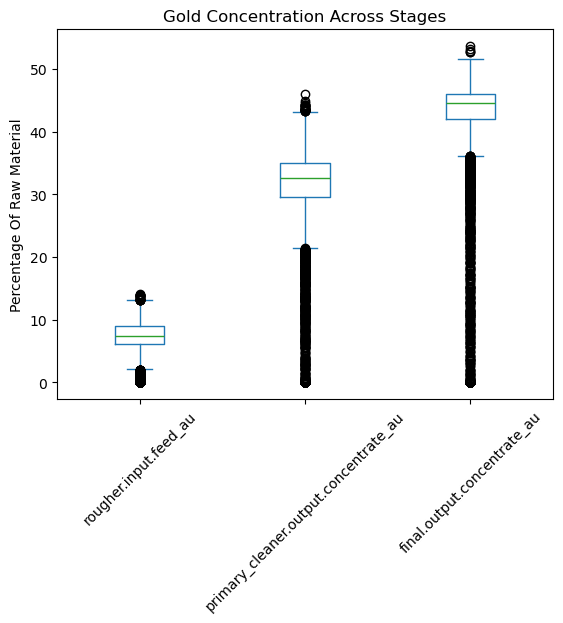



Silver Stages


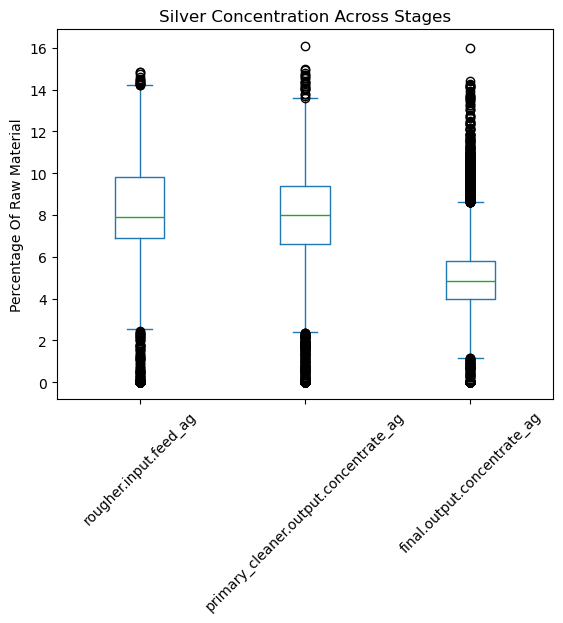



Lead Stages


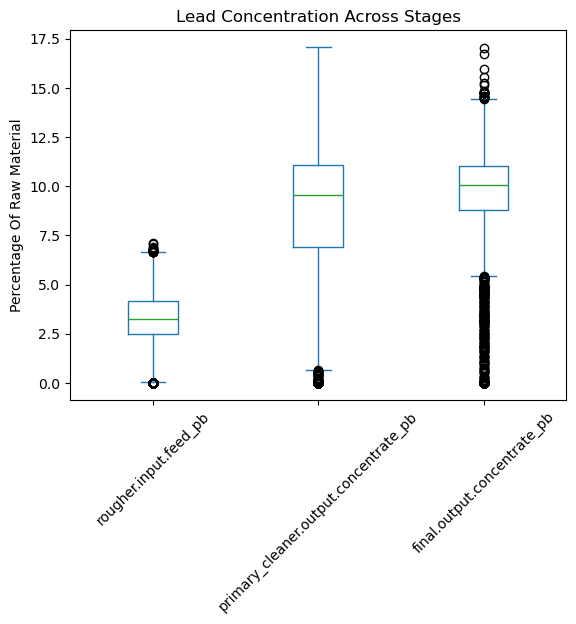

In [25]:
#Gold(Au) #Silver(Ag) #Lead(Pb)

goldtrain_stages = ["rougher.input.feed_au", "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]
silvertrain_stages = ["rougher.input.feed_ag", "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]
leadtrain_stages = ["rougher.input.feed_pb", "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]



def pltstages(df,stages,kind):
    df[stages].plot(kind='box',title= f"{kind} Concentration Across Stages")
    plt.xticks(rotation=45) 
    plt.ylabel("Percentage Of Raw Material")
    
    filename = f'{kind.lower().replace(" ", "_")}_concentration_stages.png'
    plt.savefig(os.path.join(visuals_path, filename), dpi=300, bbox_inches='tight')
    plt.show()
    
    
print("Gold Stages Train")
pltstages(golddf_train,goldtrain_stages,"Gold")
print()
print()
print("Silver Stages")
pltstages(golddf_train,silvertrain_stages,"Silver")
print()
print()
print("Lead Stages")
pltstages(golddf_train,leadtrain_stages,"Lead")

concentration visualization based on purification stage. 

Concentration Visualization Conclusion: 

1.) GOLD - In each stage of the gold extraction process the concentration of gold steadily increases starting at a little under 10 percent leading to the final ouput of gold being close to 50 percent. In the rougher feed stage the concentration is slightly under 10%, in the primary cleaner output stage the concentration is a a few points above 30%, and in the final output stage the final extraction has only increased by what seeems to be a  15 points closer to 45% concentration. 

2.) SILVER - In each stage of the Silver extration process the concentration of Silver is very voletile in every phase.  In the rougher feed stage the concentration is slightly under 8%, in the primary cleaner output stage the concentration is a little over 8%, and in the final output stage the final extraction has decreased by what seeems to be a couple points closer to 5% concentration. 

3.) LEAD - In each stage of the lead extraction process the concentration of Lead progresses quite slowly. In the rougher feed stage the concentration is slightly under 4%, in the primary cleaner output stage the concentration is a little under 10%, and in the final output stage the final extraction has only increased by what seeems to be a couple points closer to 12% concentration. 

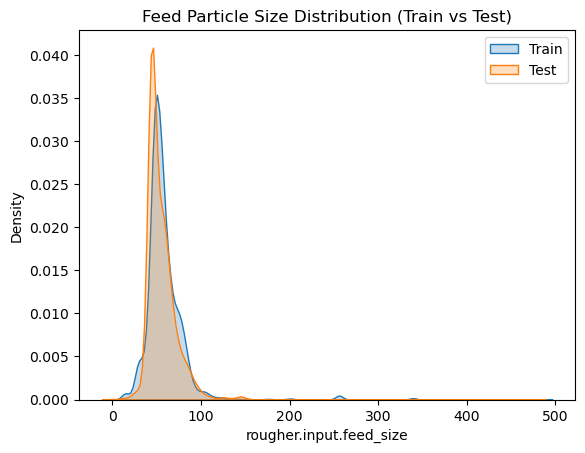

In [26]:
plot_name_01 = "feed_particle_size_distribution"

sns.kdeplot(golddf_train["rougher.input.feed_size"], label="Train", fill=True)
sns.kdeplot(golddf_test["rougher.input.feed_size"], label="Test", fill=True)
plt.legend()
plt.title("Feed Particle Size Distribution (Train vs Test)")
plt.savefig(os.path.join(visuals_path, f'{plot_name_01}.png'), dpi=300)
plt.show()

Feed Partical Size Comparision Conclusion: 

The density of the feed particle size between the training and the test data are almost identical indicating there isn't much of a differential. 

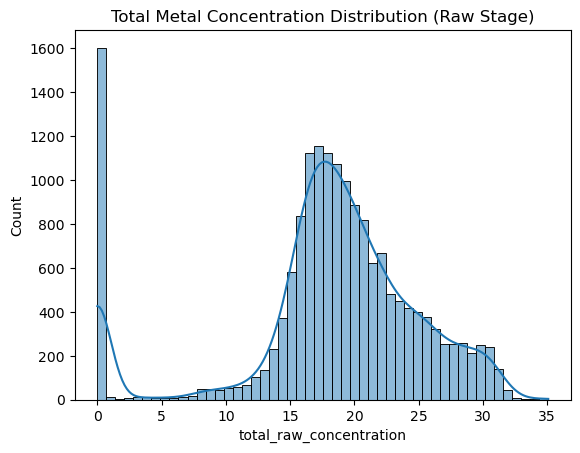

In [27]:
plot_name_02 = "Total Metal Concentration (Raw Stage)"


golddf_full['total_raw_concentration'] = golddf_train['rougher.input.feed_au'] + golddf_train['rougher.input.feed_ag'] + golddf_train['rougher.input.feed_pb'] 
sns.histplot(golddf_full["total_raw_concentration"], bins=50, kde=True)
plt.title("Total Metal Concentration Distribution (Raw Stage)")
plt.savefig(os.path.join(visuals_path, f'{plot_name_02}.png'), dpi=300)

plt.show()

In [24]:
Q1_r = golddf_full["total_raw_concentration"].quantile(0.25)
Q3_r = golddf_full["total_raw_concentration"].quantile(0.75)
IQR_r = Q3_r - Q1_r

golddf_full = golddf_full[
    (golddf_full["total_raw_concentration"] >= (Q1_r - 1.5 * IQR_r)) &
    (golddf_full["total_raw_concentration"] <= (Q3_r + 1.5 * IQR_r))
]

/var/folders/nq/rjlw7m5x2hx0l0h5d2fjgyn80000gn/T/ipykernel_2565/3071086208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  golddf_full.loc[:, 'total_rougher_concentration'] = (


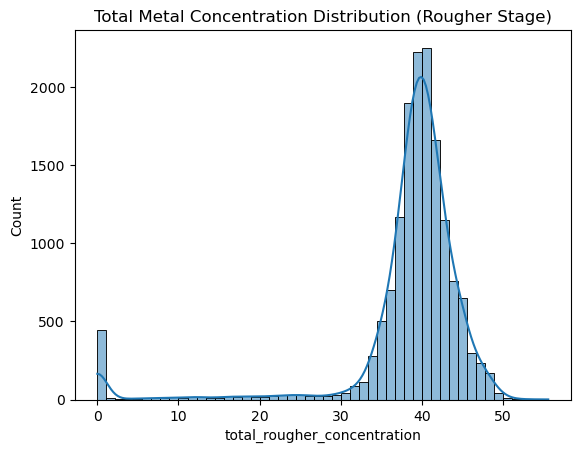

In [ ]:
import seaborn as sns

plot_name_03 = "Total Metal Concentration (Rougher Stage)"

golddf_full.loc[:, 'total_rougher_concentration'] = (
golddf_train['rougher.output.concentrate_au'] + 
golddf_train['rougher.output.concentrate_ag'] + 
golddf_train['rougher.output.concentrate_pb'])
sns.histplot(golddf_full["total_rougher_concentration"], bins=50, kde=True)
plt.title("Total Metal Concentration Distribution (Rougher Stage)")
plt.savefig(os.path.join(visuals_path, f'{plot_name_03}.png'), dpi=300)
plt.show()

In [26]:
Q1_rough = golddf_full["total_rougher_concentration"].quantile(0.25)
Q3_rough = golddf_full["total_rougher_concentration"].quantile(0.75)
IQR_rough = Q3_rough - Q1_rough

golddf_full = golddf_full[
    (golddf_full["total_rougher_concentration"] >= (Q1_rough - 1.5 * IQR_rough)) &
    (golddf_full["total_rougher_concentration"] <= (Q3_rough + 1.5 * IQR_rough))
]

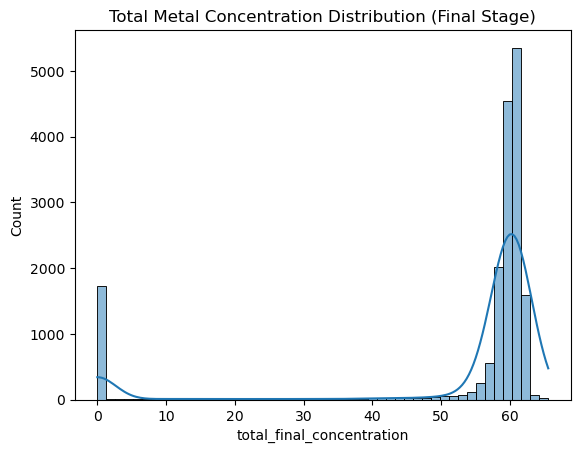

In [28]:
plot_name_04 = "Total Metal Concentration (Final Stage)"

golddf_full['total_final_concentration'] = golddf_train['final.output.concentrate_au'] + golddf_train['final.output.concentrate_pb'] + golddf_train['final.output.concentrate_ag'] 
sns.histplot(golddf_full["total_final_concentration"], bins=50, kde=True)
plt.title("Total Metal Concentration Distribution (Final Stage)")
plt.savefig(os.path.join(visuals_path, f'{plot_name_04}.png'), dpi=300)
plt.show()

In [28]:
Q1_final = golddf_full["total_final_concentration"].quantile(0.25)
Q3_final = golddf_full["total_final_concentration"].quantile(0.75)
IQR_f = Q3_final - Q1_final

golddf_full = golddf_full[
    (golddf_full["total_final_concentration"] >= (Q1_final - 1.5 * IQR_f)) &
    (golddf_full["total_final_concentration"] <= (Q3_final + 1.5 * IQR_f))
]

checked all 3 required stages for concentration distrobution, then using qualtile function to do away with extreme outliers. 

In [29]:


features = golddf_train.drop(columns=['date'] + list(missing_features), errors='ignore')




target_rough = golddf_train['rougher.output.recovery']  
target_final = golddf_train['final.output.recovery'] 


model_1 = RandomForestRegressor(random_state=12345)



model_2 = lgb.LGBMRegressor(
    n_estimators=500, 
    learning_rate=0.05, 
    metric='None'
)



Ive added another model the LGBM Regressor for a second model testing. 

In [30]:
#Train Rougher Model

print("Train The Random Forest Regressor Rough Model:")
rougher_model_v1 = model_1.fit(features,target_rough)
print()
print()
print("Train The Light GMB Regressor Rough Model:")
rougher_model_v2 = model_2.fit(features,target_rough)


Train The Random Forest Regressor Rough Model:


KeyboardInterrupt: 

In [ ]:
#Train Final Model 
print("Train The Random Forest Regressor Final Model:")
final_model_v1 = model_1.fit(features,target_final)
print()
print()
print("Train The Light GMB Regressor Final Model:")
final_model_v2 = model_2.fit(features,target_final)

Train The Random Forest Regressor Final Model:


Train The Light GMB Regressor Final Model:


In [ ]:
print("Prediction Of The Random Forest Regressor:")
rough_predict_v1 = rougher_model_v1.predict(features)
final_predict_v1 = final_model_v1.predict(features)
print()
print()
print("Prediction Of The Light GMB Regressor:")
final_predict_v2 = final_model_v2.predict(features)
rough_predict_v2 = rougher_model_v2.predict(features)


Prediction Of The Random Forest Regressor:


Prediction Of The Light GMB Regressor:


Training Model For Rougher and Final Stages of Gold Purification, Will use data to pick best model. 

In [ ]:
def smape(y_true,y_pred):
    y_true = np.nan_to_num(y_true, nan=0)
    y_pred = np.nan_to_num(y_pred, nan=0)
    error = np.abs(y_true-y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    denominator = np.where(denominator == 0, 1e-8, denominator)
    smape = np.mean(error / denominator) * 100
    
    return smape


smape_scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
#function for final SMAPE

def final_smape(y_true_rougher,y_pred_rougher,y_true_final,y_pred_final):
    smape_rougher = smape(y_true_rougher,y_pred_rougher)
    smape_final = smape(y_true_final,y_pred_final)
    weighted_smape = .25 * smape_rougher + .75 * smape_final
    return weighted_smape


SMAPE and Final SMAPE functions created. (although I found it easier to just input the Final SMAPE manually)

In [ ]:
smape_rough_v1 = smape(target_rough, rough_predict_v1)
smape_final_v1 = smape(target_final, final_predict_v1)

print(f"Rougher SMAPE Score Random Foest Regressor: {smape_rough_v1:.2f}%")
print(f"Final SMAPE Score Random Forest Regressor: {smape_final_v1:.2f}%")
print()
print()

Rougher SMAPE Score Random Foest Regressor: 34.85%
Final SMAPE Score Random Forest Regressor: 8.29%




In [ ]:
smape_rough_v2 = smape(target_rough, rough_predict_v2)
smape_final_v2 = smape(target_final, final_predict_v2)

print(f"Rougher SMAPE Score Light GMB Regressor: {smape_rough_v2:.2f}%")
print(f"Final SMAPE Score Light GMB Regressor: {smape_final_v2:.2f}%")
print()
print()

Rougher SMAPE Score Light GMB Regressor: 35.44%
Final SMAPE Score Light GMB Regressor: 11.99%




In [ ]:
final_smae_v1 = .25 * smape_rough_v1 + .75 * smape_final_v1
print(f"Final SMAPE Score Random Forest Regressor: {final_smae_v1:.2f}%")

Final SMAPE Score Random Forest Regressor: 14.93%


In [ ]:
final_smae_v2 = .25 * smape_rough_v2 + .75 * smape_final_v2
print(f"Final SMAPE Score Light GMB Regressor: {final_smae_v2:.2f}%")

Final SMAPE Score Light GMB Regressor: 17.85%


SMAPE and Final SMAPE results

In [ ]:
print("Rough Val Score of Random Forest Regressor Model:")

rough_val_score_v1 = cross_val_score(model_1, features, target_rough, cv=3, scoring=smape_scorer)
final_val_score_v1 = cross_val_score(model_1, features, target_final, cv=3, scoring=smape_scorer)

print("Cross Validation Scores for  Random Forest Rougher Model:", rough_val_score_v1)
print("Cross Validation Scores for  Random Forest Final Model:", final_val_score_v1)

Rough Val Score of Random Forest Regressor Model:
Cross Validation Scores for  Random Forest Rougher Model: [-21.94254343 -19.04662799 -25.64967015]
Cross Validation Scores for  Random Forest Final Model: [-24.66587409 -22.51013955 -24.41992656]


Cross Validation for both models. The Rougher Stage trained model performed better. Will be going forward with this model. 

In [ ]:
print("Rough Val Score of Light GMB Regressor Model:")

rough_val_score_v2 = cross_val_score(model_2, features, target_rough, cv=3, scoring=smape_scorer)
final_val_score_v2 = cross_val_score(model_2, features, target_final, cv=3, scoring=smape_scorer)

print("Cross Validation Scores for Light GMB  Rougher Model:", rough_val_score_v2)
print("Cross Validation Scores for Light GMB  Final Model:", final_val_score_v2)

Rough Val Score of Light GMB Regressor Model:
Cross Validation Scores for Light GMB  Rougher Model: [-19.3112334  -18.44976308 -25.34473195]
Cross Validation Scores for Light GMB  Final Model: [-25.50460863 -23.71648514 -26.77620452]


In [ ]:

model_2_tuned = lgb.LGBMRegressor()

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

print("Train The Light GMB Regressor Rough Model Tuned:")

grid_search_rough = GridSearchCV(model_2_tuned, param_grid, scoring=smape_scorer, cv=5)
grid_search_rough.fit(features, target_rough)  

best_model_rough = grid_search_rough.best_estimator_
predictions_rough = best_model_rough.predict(features)

final_smape_rough_tuned = smape(target_rough, predictions_rough)
print(f"Final SMAPE for Rougher Recovery Tuned: {final_smape_rough_tuned:.2f}%")


'---------'

print("Train The Light GMB Regressor Final Model Tuned:") 

grid_search_final = GridSearchCV(model_2_tuned, param_grid, scoring=smape_scorer, cv=5)
grid_search_final.fit(features, target_final)  

best_model_final = grid_search_final.best_estimator_
predictions_final = best_model_final.predict(features)

final_smape_final_tuned = smape(target_final, predictions_final)
print(f"Final SMAPE for Final Recovery Tuned: {final_smape_final_tuned:.2f}%")



Train The Light GMB Regressor Rough Model Tuned:
Final SMAPE for Rougher Recovery Tuned: 15.33%
Train The Light GMB Regressor Final Model Tuned:
Final SMAPE for Final Recovery Tuned: 17.43%


In [ ]:
print("Best Parameters For Rough Model Tuned:", grid_search_rough.best_params_)
print("Best Score For Rough Model Tuned:", -grid_search_rough.best_score_) 

Best Parameters For Rough Model Tuned: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score For Rough Model Tuned: 17.81847545670598


In [ ]:
print("Best Parameters For Final Model Tuned:", grid_search_final.best_params_)
print("Best Score For Final Model Tuned:", -grid_search_final.best_score_) 

Best Parameters For Final Model Tuned: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Score For Final Model Tuned: 19.62329840013896


In [ ]:
final_smae_v2_tuned = .25 * final_smape_rough_tuned + .75 * final_smape_final_tuned
print(f"Final SMAPE Score Light GMB Regressor Tuned: {final_smae_v2_tuned:.2f}%")

Final SMAPE Score Light GMB Regressor Tuned: 16.91%


In [ ]:
golddf_test = golddf_test.merge(
    golddf_full[['date', 'rougher.output.recovery','final.output.recovery']],  
    on='date',  
    how='left')

In [ ]:
#test on the Final Model 

target_final_test = golddf_test['final.output.recovery']
features_test = golddf_test.drop(columns=['date','final.output.recovery','rougher.output.recovery'],errors='ignore')


In [ ]:
#test on the Rougher Model, it produced better val score 


target_rough_test = golddf_test['rougher.output.recovery']



In [ ]:
missing_features = set(features.columns) - set(features_test.columns)
extra_features = set(features_test.columns) - set(features.columns)

print("Missing in test set:", missing_features)
print("Unexpected extra features in test set:", extra_features)

Missing in test set: set()
Unexpected extra features in test set: set()


In [ ]:
predictions_rough = rougher_model_v1.predict(features_test)
predictions_final = final_model_v1.predict(features_test)

In [ ]:
print("Rougher Model vs Test Set SMAPE Score:")

smape_score_test_rough = smape(target_rough_test, predictions_rough)
print(f"Rougher Model vs Test Set SMAPE Score: {smape_score_test_rough:.2f}%")

Rougher Model vs Test Set SMAPE Score:
Rougher Model vs Test Set SMAPE Score: 84.57%


In [ ]:
print("Final Model vs Test Set SMAPE Score:")

smape_score_test_final = smape(target_final_test, predictions_final)
print(f"Final Model vs Test Set SMAPE Score: {smape_score_test_final:.2f}%")

Final Model vs Test Set SMAPE Score:
Final Model vs Test Set SMAPE Score: 69.09%


In [ ]:
final_test_smae = .25 * smape_score_test_rough + .75 * smape_score_test_final

print(f"Final SMAPE Score For Testing Set Rougher and Final: {final_test_smae:.2f}%")

Final SMAPE Score For Testing Set Rougher and Final: 72.96%


In [ ]:
dummy_model = DummyRegressor(strategy="median")

dummy_model.fit(features, target_rough)

dummy_predictions = dummy_model.predict(features_test)

dummy_smape = smape(target_final_test, dummy_predictions)
print(f"Dummy Model SMAPE: {dummy_smape:.2f}%")

Dummy Model SMAPE: 77.11%


In [ ]:
lgb_predictions = best_model_rough.predict(features_test)
lgb_smape = smape(target_final_test, lgb_predictions)
print(f"LGBM Best Model SMAPE: {lgb_smape:.2f}%")


LGBM Model SMAPE: 75.61%


In [ ]:
if lgb_smape < dummy_smape:
    print("The Best LGBM model performs better than the Dummy model.")
else:
    print("The Best LGBM model is not significantly better than a simple constant prediction!")

The Best LGBM model performs better than the Dummy model.


# Conculsion: 
We have conducted an SDA , RandomForestRegressor and LGBM model training and testing in this project. We've used all 3 raw datasets to test and compare the possible outcomes to pick the best functioning model. Then we've tested this model against a Constant Dummy Model to sanity check the models quality. In conclusion we've found the best hyperparmeters for our best model LGBM Rougher Model. This model has proven to be the best model for our projects predictions, outscoring all other in our cross validation checks as well as passing the sanity check.